# Citiy comparison: East vs. West Germany

In this Notebook I would like to explore some very basic differences of living in Germany.
I will do this with a set of four criteria: Education, Food, Leisure and Culture.
Leipzig and Dresden will represent east Germany, whereas Frankfurt and Nürnberg represent west Germany.

In [1]:
! pip install folium

In [2]:
import pandas as pd
import numpy as np
import bs4 as bs
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pickle
import requests
import folium
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize

style.use("ggplot")

In [3]:
#Postal Codes of German Cities
dresden = int("01067")
leipzig = int("04103")
frankfurt = 60311
nürnberg = 90402

#Create DataFrame
cities = pd.DataFrame({"City":["Dresden", "Leipzig", "Frankfurt", "Nürnberg"], 
                        "Postal Code":[dresden, leipzig, frankfurt, nürnberg]})
cities

,City,Postal Code
0,Dresden,1067
1,Leipzig,4103
2,Frankfurt,60311
3,Nürnberg,90402


In [4]:
# get coordinates:
geolocator = Nominatim(user_agent="get_ll", timeout = 3)

cities["Latitude"] = 0
cities["Longitude"] = 0

for i in range(0,len(cities.index)):
    location = geolocator.geocode(cities.iloc[i, 0])
    cities.iloc[i, 2] = location.latitude
    cities.iloc[i, 3] = location.longitude

cities

,City,Postal Code,Latitude,Longitude
0,Dresden,1067,51.049329,13.738144
1,Leipzig,4103,51.340632,12.374733
2,Frankfurt,60311,50.110644,8.682092
3,Nürnberg,90402,49.453872,11.077298


In [5]:
# create map of New York using latitude and longitude values
location = geolocator.geocode("Germany")
latitude = location.latitude
longitude = location.longitude

germany_map = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, city in zip(cities['Latitude'], cities['Longitude'], cities['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(germany_map)  

    
germany_map

In [42]:
# The code was removed by Watson Studio for sharing.

In [7]:
#Set up Foursquare
VERSION = '20200301'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FFTKQJWIZCWYRECOV1Q3UPQLMJDVGIPUV2QCONRP13EBZQSZ
CLIENT_SECRET:5FGTT3YRX2EEGQH2HTUTFCYGOSXKKYQYKZV523TSKA42UV3O


In [8]:
#Define Specific criteria on which the citys can be compared
culture = ["Museum", "Park", "Theater", "Oper"]
leisure = ["Schwimmbad", "Kino", "Bowling"]
restaurants = ["Italian", "Spanish", "Sushi", "Chinese", "Korean", "Indian","African"]
education = ["Hochschule", "Universität", "University", "Schule", "Kindergarten"]

#Summarize them in one single list for easy iteration
criteria = [culture, leisure, restaurants, education]

In [9]:
#Full List of venues for every City, Criteria and Criteria-Instance
crit_venues = []

#Bool for checking wether its the first iteration
first_entry = True
first_crit = True
first_city = True

#Iterate for cities Data Frame
for index, city in cities.iterrows():
    #Set coordinates for foursquare request
    latitude = city["Latitude"]
    longitude = city["Longitude"]
    
    first_crit = True
    #Only append to list after first iteration, since otherwise the appended list is empty
    if first_city:
        first_city = False
    else:
        #Append education
        crits.append(results)
        #Append full
        crit_venues.append(crits)
    
    #Iterate through Criteria List
    for crit in criteria:
        #reset List on first iteration
        if first_crit: 
            crits = []
            first_crit = False
        else:
            crits.append(results)
            
        first_entry = True
        
        #get venues for every criteria entry
        for entry in crit:
            #reset list on first iteration
            if first_entry:
                results = []
                first_entry = False
                
            url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, entry, LIMIT)

            result = requests.get(url).json()
            results.append(result)

#Append last results (since they didn't get appendet as the for loop stoped)
crits.append(results)
crit_venues.append(crits)

{'meta': {'code': 200, 'requestId': '5e60dbed6d8c56001be43747'},
 'response': {'venues': [{'id': '4bc1d16b920eb713ba281b2c',
    'name': 'Deutsches Hygiene-Museum',
    'location': {'address': 'Lingnerplatz 1',
     'lat': 51.04428103186034,
     'lng': 13.74666452407837,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.04428103186034,
       'lng': 13.74666452407837}],
     'distance': 819,
     'postalCode': '01069',
     'cc': 'DE',
     'city': 'Dresden',
     'state': 'Sachsen',
     'country': 'Deutschland',
     'formattedAddress': ['Lingnerplatz 1', '01069 Dresden', 'Deutschland']},
    'categories': [{'id': '4bf58dd8d48988d191941735',
      'name': 'Science Museum',
      'pluralName': 'Science Museums',
      'shortName': 'Science Museum',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_science_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1583406111',
    'hasPerk': False},
   {'id': '5caef2

In [43]:
first_venue = True
first_crit = True
first_city = True
venue_df = None
first = True

str_criteria = ["culture", "leisure", "restaurants", "education"]

venue_counter = 0
crit_counter = 0
city_counter = 0

for city in crit_venues:
    
    if first_city:
        first_city = False
    else:
        city_counter += 1
    
    first_crit = True
    
    for crit in crit_venues[city_counter]:
        
        if first_crit:
            first_crit = False
            crit_counter = 0
        else:
            crit_counter+=1
            
        first_venue = True
        
        
        for venue in crit_venues[city_counter][crit_counter]:
            
            if first_venue:
                venue_counter = 0
                first_venue = False
                step = json_normalize(venue["response"]["venues"])
                step["Venue"] = criteria[crit_counter][venue_counter]
                step["Criteria"] = str_criteria[crit_counter]
                step["City"] = cities.loc[city_counter, "City"]
                if first:
                    venue_df = step.copy()
                    first = False
                else:
                    venue_df = venue_df.append(step)
            else:    
                step = json_normalize(venue["response"]["venues"])
                step["Venue"] = criteria[crit_counter][venue_counter]
                step["Criteria"] = str_criteria[crit_counter]
                step["City"] = cities.loc[city_counter, "City"]
                venue_df = venue_df.append(step)
                
            venue_counter += 1

In [12]:
final_df = venue_df[["City","Criteria", "Venue", "name", "location.lat", "location.lng","location.postalCode",  "location.city"]]
final_df.rename(columns = {"location.lat":"Latitude"}, inplace = True)
final_df.rename(columns = {"location.lng":"Longitude"}, inplace = True)
final_df.rename(columns = {"location.postalCode":"Postcode"}, inplace = True)
final_df.rename(columns = {"name":"Name"}, inplace = True)

final_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,City,Criteria,Venue,Name,Latitude,Longitude,Postcode,location.city
0,Dresden,culture,Museum,Deutsches Hygiene-Museum,51.044281,13.746665,01069,Dresden
1,Dresden,culture,Museum,Museum Wentao,51.044727,13.739973,01069,Dresden
2,Dresden,culture,Museum,H Deutsches Hygiene-Museum,51.047682,13.749675,01069,Dresden
3,Dresden,culture,Museum,Erich Kästner Museum,51.063724,13.745667,01097,Dresden
4,Dresden,culture,Museum,Militärhistorisches Museum der Bundeswehr (MHM),51.077802,13.759547,01099,Dresden


In [13]:
final_df.shape

(1841, 8)

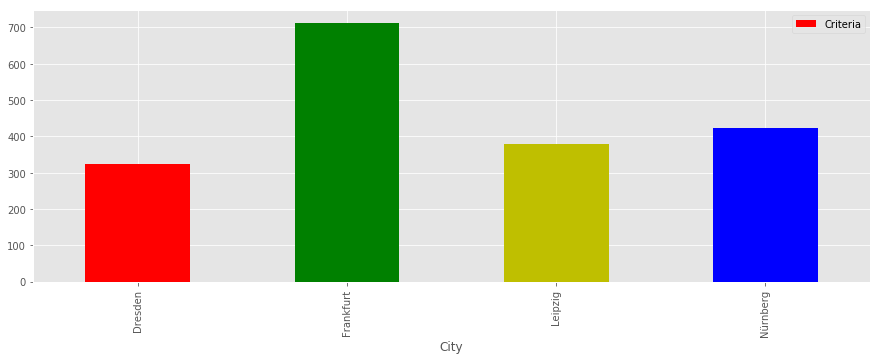

In [14]:
final_df.groupby("City")["Criteria"].aggregate("count").plot(kind = "bar", figsize = (15, 5), color = ["r", "g", "y", "b"], legend=True)
plt.show()

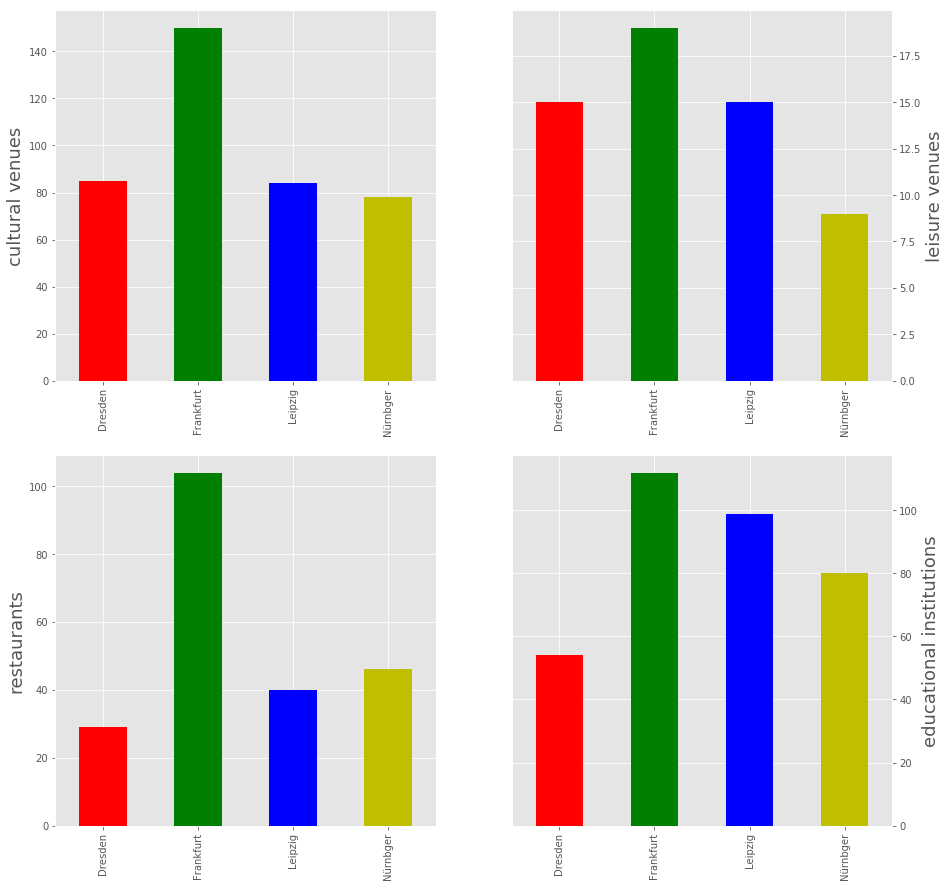

In [54]:
fig = plt.figure(figsize = (15,15))

cities = ["Dresden", "Frankfurt", "Leipzig", "Nürnbger"]

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

final_df[final_df["Criteria"] == "culture"].groupby("City")["Criteria"].value_counts().plot(kind = "bar", color = ["r", "g", "b","y"], ax = ax1)
final_df[final_df["Criteria"] == "leisure"].groupby("City")["Criteria"].value_counts().plot(kind = "bar",color = ["r", "g", "b", "y"], ax = ax2)
final_df[final_df["Criteria"] == "restaurants"].groupby("City")["Criteria"].value_counts().plot(kind = "bar",color = ["r", "g", "b", "y"], ax = ax3)
final_df[final_df["Criteria"] == "education"].groupby("City")["Criteria"].value_counts().plot(kind = "bar",color = ["r", "g", "b", "y"], ax = ax4)

ax1.set_ylabel(ylabel = "cultural venues", fontsize = 18)
ax1.set_xticklabels(cities)
ax1.set_xlabel("")

ax2.set_ylabel(ylabel = "leisure venues", fontsize = 18)
ax2.yaxis.set_label_position("right")
ax2.set_xticklabels(cities)
ax2.yaxis.tick_right()
ax2.set_xlabel("")

ax3.set_ylabel("restaurants", fontsize = 18)
ax3.set_xticklabels(cities)
ax3.set_xlabel("")

ax4.set_ylabel("educational institutions", fontsize = 18)
ax4.yaxis.set_label_position("right")
ax4.set_xticklabels(cities)
ax4.yaxis.tick_right()
ax4.set_xlabel("")

plt.show()

### Explore why Frankfurt has so many more venues than the other cities:

In [17]:
location = geolocator.geocode("Frankfurt, DE", timeout = 3)
latitude = location.latitude
longitude = location.longitude

frankfurt_map = folium.Map(location=[latitude, longitude], zoom_start=10)

frankfurt_culture = final_df[(final_df["City"] == "Frankfurt") & (final_df["Criteria"] == "culture")]

# add markers to map
for lat, lng, venue in zip(frankfurt_culture['Latitude'], frankfurt_culture['Longitude'], frankfurt_culture['Name']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(frankfurt_map)  
    
frankfurt_map

##### It looks like foursquare went a bit overboard with the results. Wiesbaden is defnetly not Frankfurt.
##### Lets check all the citiy locations: 

In [18]:
final_df["location.city"].unique()

array(['Dresden', 'Radebeul', 'Coswig', 'Rabenau', 'Kamenz', 'Pirna', nan,
       'Frauenstein', 'Bautzen', 'Hohnstein', 'Oedersn',
       'Neuhausen/Erzgeb.', 'Großkoschen', 'Meißen', 'Freiberg',
       'Moritzburg', 'Riesa', 'Ruhland', 'Mügeln', 'Berlin', 'Königstein',
       'Mikulov', 'Děčín', 'Döbeln', 'Meziboří', 'Ústí nad Labem',
       'Schwarzheide', 'Bühlau', 'Bischofswerda', 'Ottendorf-Okrilla',
       'Litvínov', 'Dresden-Niederpoyritz', 'Kreischa', 'Schwepnitz',
       'Bad Schandau', 'Nossen', 'Oederan', 'Bannewitz', 'Stolpen',
       'Dorfchemnitz', 'Senftenberg', 'Leipzig', 'Lützen', 'Machern',
       'Halle', 'Altenburg', 'Merseburg', 'Zschadraß', 'Zeitz',
       'Markkleeberg', 'Großpösna', 'Wurzen', 'Bad Lauchstädt',
       'Waldenburg', 'Taucha', 'Leuna', 'Merseburg (Saale)', 'Weißenfels',
       'Delitzsch', 'Beucha', 'Naunhof', 'Grimma', 'Zeitz-Grana',
       'Geithain', 'Meuselwitz', 'Günthersdorf', 'Belgershain',
       'Borsdorf', 'Jesewitz', 'Gröben', 'Nöbdeni

That is way to many. 
So lets try just to take the venues directly located in the cities

### Drop every Location that is not directly one of the cities of interest

In [19]:
final_df = final_df[(final_df["location.city"] == "Nürnberg") | (final_df["location.city"] == "Frankfurt am Main")
        | (final_df["location.city"] == "Dresden") | (final_df["location.city"] == "Leipzig")]

In [20]:
#Lets check Frankfurt again
location = geolocator.geocode("Frankfurt, DE")
latitude = location.latitude
longitude = location.longitude

frankfurt_map = folium.Map(location=[latitude, longitude], zoom_start=12)

frankfurt_culture = final_df[(final_df["City"] == "Frankfurt") & (final_df["Criteria"] == "culture")]

# add markers to map
for lat, lng, venue, category in zip(frankfurt_culture['Latitude'], frankfurt_culture['Longitude'], frankfurt_culture['Name'], frankfurt_culture["Criteria"]):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(frankfurt_map)

    

frankfurt_map

That looks much better.
Now plot them again and then we can try to summarize the findings

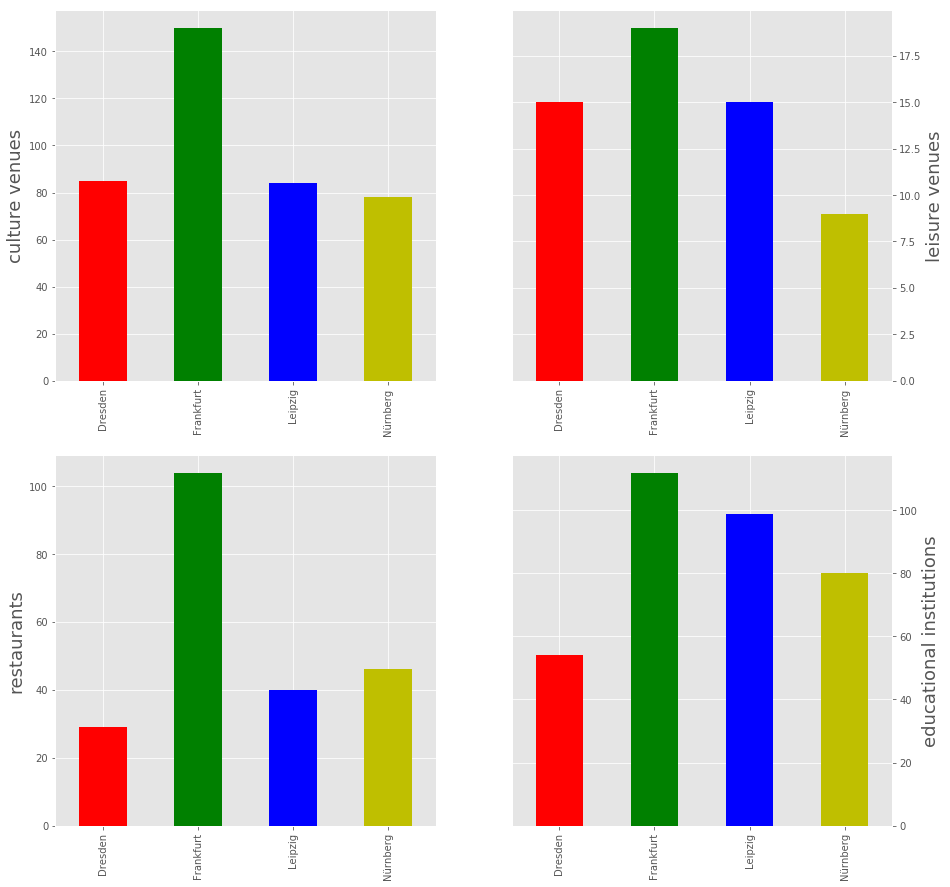

In [21]:
city_list = ["Dresden", "Frankfurt", "Leipzig", "Nürnberg"]

fig = plt.figure(figsize = (15,15))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

final_df[final_df["Criteria"] == "culture"].groupby("City")["Criteria"].value_counts().plot(kind = "bar", color = ["r", "g", "b","y"], ax = ax1)
final_df[final_df["Criteria"] == "leisure"].groupby("City")["Criteria"].value_counts().plot(kind = "bar",color = ["r", "g", "b", "y"], ax = ax2)
final_df[final_df["Criteria"] == "restaurants"].groupby("City")["Criteria"].value_counts().plot(kind = "bar",color = ["r", "g", "b", "y"], ax = ax3)
final_df[final_df["Criteria"] == "education"].groupby("City")["Criteria"].value_counts().plot(kind = "bar",color = ["r", "g", "b", "y"], ax = ax4)

ax1.set_ylabel("culture venues", fontsize = 18)
ax1.set_xticklabels(labels = city_list)
ax1.set_xlabel("")

ax2.set_ylabel("leisure venues", fontsize = 18)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xticklabels(labels = city_list)
ax2.set_xlabel("")

ax3.set_ylabel("restaurants", fontsize = 18)
ax3.set_xticklabels(labels = city_list)
ax3.set_xlabel("")

ax4.set_ylabel("educational institutions", fontsize = 18)
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
ax4.set_xticklabels(labels = city_list)
ax4.set_xlabel("")

plt.show()

In [22]:
final_df.reset_index(drop = True, inplace=True)

Since the cities aren't the same size, it might be more insightfull to calculate the venue density for each category and city.  
For simplicity we will use the four outermost coordinates to build a polygon and then calculate its area with the "Shoelace Method".  
As the earth is an ellipse we will have to map each polygon onto the earths surface using the sinusoidal projection method.

### 1. Find the outermost coordinates

At first we have to find the outermost coordinates. That is, the venue with the max and min Longitude as well as the max and min Latitude.

In [23]:
#calculate polygn area for each city
final_df.reset_index(drop = True, inplace=True)

def max_lat_lng(city):
    
    lat = []
    lng = []
    
    #get coordinates for max Longitude
    max_long = final_df[final_df["City"] == city]["Longitude"].max()
    lng.append(max_long)
    index = final_df.index[final_df["Longitude"] == max_long].tolist()[0]
    lat.append(final_df.loc[index, "Latitude"])
    
    #get coordinates for max Latitude
    max_lat = final_df[final_df["City"] == city]["Latitude"].max()
    lat.append(max_lat)
    index = final_df.index[final_df["Latitude"] == max_lat].tolist()[0]
    lng.append(final_df.loc[index, "Longitude"])
    
    #get coordinates for min Longitude
    min_long = final_df[final_df["City"] == city]["Longitude"].min()
    lng.append(min_long)
    index = final_df.index[final_df["Longitude"] == min_long].tolist()[0]
    lat.append(final_df.loc[index, "Latitude"])
    
    #get coordinates for min Latitude
    min_lat = final_df[final_df["City"] == city]["Latitude"].min()
    lat.append(min_lat)
    index = final_df.index[final_df["Latitude"] == min_lat].tolist()[0]
    lng.append(final_df.loc[index, "Longitude"])

    
    return lat, lng   


### 2. Sinusoidal Projection

Map the area to the spherical shape of the earth.

In [29]:
def sinusoidal(latitude, longitude):
    """Returns the x and y coordinates in m"""
    from math import pi, radians, cos
    earth_radius = 6371009 #In meter
    lat_distance = pi * earth_radius / 180.0
    
    lat_list = [lat * lat_distance for lat in latitude]
    lng_list = [lng * lat_distance * cos(radians(lat)) for lat, lng in zip(latitude, longitude)]
    
    return lat_list, lng_list

In [30]:
def calculate_area(latitude, longitude):
    """Calculates the area of a polygon given a list of its coordinates, by applying the Shoelace method from Gauss."""
    area = 0.0
    for i in range(-1, len(latitude) - 1):
        area += longitude[i] * (latitude[i+1] - latitude[i-1])
        
    return abs(area) / 2

In [37]:
lat_list, lng_list = max_lat_lng("Frankfurt")
lat_list, lng_list = sinusoidal(lat_list, lng_list)
frankfurt_area = round(calculate_area(lat_list, lng_list) / 1000000, 2)  #Convert to sqkm and round
print("The considered area of Frankfurt is: {} sqkm".format(frankfurt_area))

The considered area of Frankfurt is: 144.01 sqkm


#### Lets map the coordinates:

In [39]:
# Get df of the rows matching the coordinates
lat_list, lng_list = max_lat_lng("Frankfurt")

city_area_df = final_df[(final_df["Latitude"].isin(lat_list)) & (final_df["Longitude"].isin(lng_list))]
city_area_df

,City,Criteria,Venue,Name,Latitude,Longitude,Postcode,location.city
659,Frankfurt,restaurants,Korean,Korean Air Flight KE 906,50.043135,8.588770,NaN,Frankfurt am Main
684,Frankfurt,restaurants,Indian,Indian Pepper,50.084990,8.514594,65931,Frankfurt am Main
763,Frankfurt,education,Schule,Anna-Schmidt-Schule,50.202810,8.711494,60437,Frankfurt am Main
765,Frankfurt,education,Schule,Heinrich-Kraft-Schule,50.119418,8.768472,60386,Frankfurt am Main


In [40]:
location = geolocator.geocode("Frankfurt, DE")
latitude = location.latitude
longitude = location.longitude

frankfurt_area_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

for lat, lng, venue in zip(city_area_df["Latitude"], city_area_df["Longitude"], city_area_df["Name"]):
    label = "{}".format(venue)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        color = "blue",
        fill = True,
        fill_color = "#3186cc",
        fill_opacity = 0.7,
        parse_html = False).add_to(frankfurt_area_map)

# Convert lat and long list to a single list of tuples for the folium.polyline method
tuple_list = tuple(zip(lat_list, lng_list))

folium.PolyLine(tuple_list).add_to(frankfurt_area_map)

frankfurt_area_map

# Observation:

Nürnberg, Dresden and Leipzig don't seem to be too far apart in regards to the four categories.
Frankfurt on the other hand is an outlier. Espacially in Culture and Restaurants.
I am quite surprised that Frankfurt seems to have so much more Restaurants than the other three cities.
The explanation is to be found in the criteria I picked for the restaurants: 
            "Italian", "Spanish", "Sushi", "Chinese", "Korean", "Indian","African"
These are all foreign cuisines. And since Frankfurt is known to be a particularily multi cultural city it doesn't surprise, that many restaurants of foreign cuisine are to be found there.
Wheras Nürnberg Dresden and Leipzig seem to have less of a cultural variety.

# Restrictions:

In this comparison I chose 4 cities with roughly the same size. It is to be noted though, that that Franfurt has roughly 200k more inhabitants.
A more precise way to look at the data would possibly be calculating the criteria in proportion to population count, or square kilometer.
Also the availability of Jobs, the payment and the living cost contribute a hughe part to the living quality in one place. This hasn't been taken into account in this exploration.

# Conclusion:

It seems that Frankfurt has defnetly a lot more variety going than the other three cities.
Between Nürnberg, Dresden and Leipzig doesn't seem to be a big difference though. 
We could conclude from this, that living quality in the cities of east germany matches this of west german cities.
That is for the big cities. I don't think one could draw reliable conclusions from this for the whole east / west german perspective.
To do this one had to take into account the population density in the areas as well.
Nevertheless it was interesting to see in how the cities compare to each other.